In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [158]:
data=pd.read_csv('C:/Users/120761/Documents/PyScripts/EDA.csv')

In [159]:
data.columns

Index(['Name', 'Design', 'Salary', 'ID', 'Exp'], dtype='object')

In [160]:
data.copy

<bound method NDFrame.copy of          Name     Design  Salary  ID  Exp
0     barathi  analytics  1000.0   1  5.0
1    saravana       lead  2000.0   2  2.0
2        bala      clerk  1000.0   3  6.0
3         NaN   security   500.0   4  2.0
4       fahad      bench   500.0   5  2.0
5     karunya  developer  1000.0   6  5.0
6      dharan        NaN  3000.0   7  8.0
7         NaN        NaN     NaN   8  NaN
8      karthi        NaN     NaN   9  NaN
9   rajendran    painter   200.0  10  1.0
10       siva        NaN     NaN  11  NaN
11        NaN     driver   500.0  12  2.0
12      lakah  developer  1233.0  13  4.0
13     ganesh        NaN     NaN  14  NaN
14        rao  scientist     NaN  15  NaN>

In [161]:
data

,Name,Design,Salary,ID,Exp
0,barathi,analytics,1000.0,1,5.0
1,saravana,lead,2000.0,2,2.0
2,bala,clerk,1000.0,3,6.0
3,NaN,security,500.0,4,2.0
4,fahad,bench,500.0,5,2.0
5,karunya,developer,1000.0,6,5.0
6,dharan,NaN,3000.0,7,8.0
7,NaN,NaN,NaN,8,NaN
8,karthi,NaN,NaN,9,NaN
9,rajendran,painter,200.0,10,1.0


In [162]:
#missing values to find

features_with_na=[features for features in data.columns if data[features].isnull().sum()>1]
features_with_na

['Name', 'Design', 'Salary', 'Exp']

In [163]:
for features in features_with_na:
    print(features,np.round(data[features].isnull().mean(),4),'%missing values')

Name 0.2 %missing values
Design 0.3333 %missing values
Salary 0.3333 %missing values
Exp 0.3333 %missing values


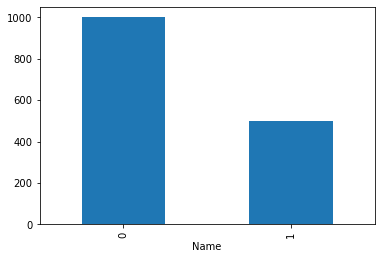

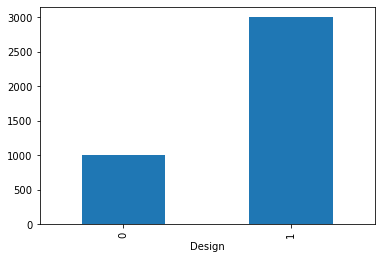

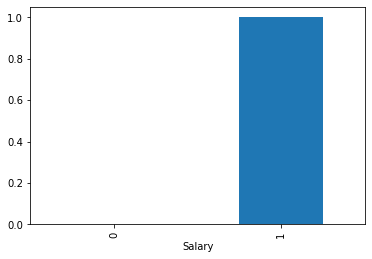

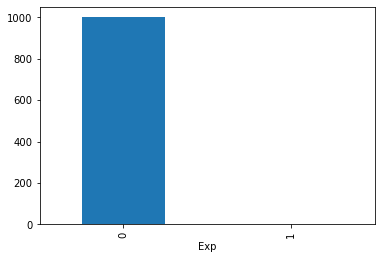

In [164]:
#if any missing values we need to say it as 1 else 0 with respect to salary column

for features in features_with_na:
    dataset=data.copy()
    
    dataset[features]= np.where(dataset[features].isnull(),1,0)
    dataset.groupby(features)['Salary'].median().plot.bar()
    plt.show()

In [165]:
print('total ID - {}'.format(len(data.ID)))

total ID - 15


In [166]:
#finding the Numerical variables 


features_with_numbers=[features for features in data.columns if data[features].dtypes!='O']
features_with_numbers

['Salary', 'ID', 'Exp']

In [167]:
print('total numerical features',len(features_with_numbers))

total numerical features 3


In [168]:
data[features_with_numbers]

,Salary,ID,Exp
0,1000.0,1,5.0
1,2000.0,2,2.0
2,1000.0,3,6.0
3,500.0,4,2.0
4,500.0,5,2.0
5,1000.0,6,5.0
6,3000.0,7,8.0
7,NaN,8,NaN
8,NaN,9,NaN
9,200.0,10,1.0


In [169]:
exp_feature=[features for features in features_with_numbers if 'Exp' in features]
exp_feature

['Exp']

In [170]:
for features in name_Sal_features:
    print(features,data[features].unique())

In [171]:
data[features]

0     5.0
1     2.0
2     6.0
3     2.0
4     2.0
5     5.0
6     8.0
7     NaN
8     NaN
9     1.0
10    NaN
11    2.0
12    4.0
13    NaN
14    NaN
Name: Exp, dtype: float64

Text(0, 0.5, 'Salary')

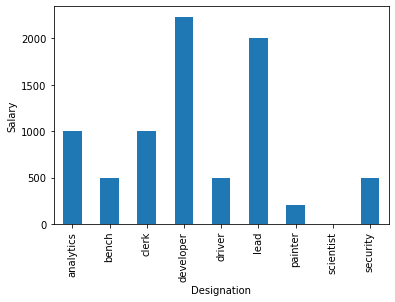

In [172]:
#analysisng temprory dataset using charts

data.groupby('Design')['Salary'].sum().plot.bar()
plt.xlabel('Designation')
plt.ylabel('Salary')



In [173]:
exp_feature

['Exp']

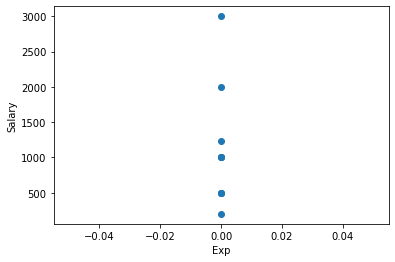

In [174]:
for features in exp_feature:
    dataset=data.copy()
    
    dataset[features]=data['Exp']-dataset[features]
    plt.scatter(dataset[features],data['Salary'])
    plt.xlabel(features)
    plt.ylabel('Salary')
    plt.show()


In [175]:
#finding Category features

features_category=[features for features in data.columns if data[features].dtypes=='O']
features_category

['Name', 'Design']

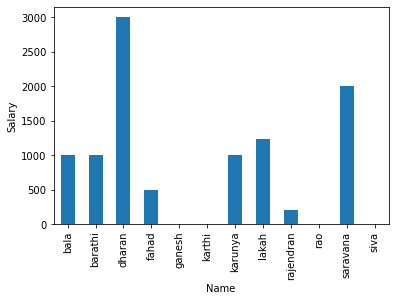

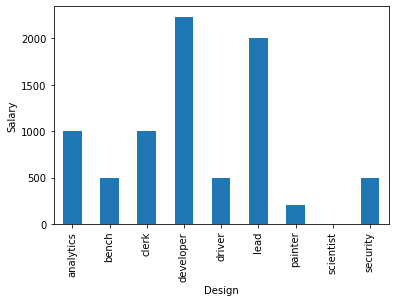

In [176]:
#comparing the Dependent variable with Categorical features

for features in features_category:
    dataset=data.copy()
    dataset.groupby(features)['Salary'].sum().plot.bar()
    plt.xlabel(features)
    plt.ylabel('Salary')
    plt.show()

In [177]:
#Replacing Nan values with missing label:

features_with_na_cate=[features for features in data.columns if data[features].isnull().sum()>1 and data[features].dtypes=='O']
features_with_na_cate

['Name', 'Design']

In [178]:
#now creating a function to replace a nan with missing:

def replacing_missing(data,features_with_na_cate):
    dataset=data.copy()
    dataset[features_with_na_cate]=dataset[features_with_na_cate].fillna('Missing')
    return(dataset)

data=replacing_missing(data,features_with_na_cate)
data[features_with_na_cate].isnull().sum()

Name      0
Design    0
dtype: int64

In [179]:
data

,Name,Design,Salary,ID,Exp
0,barathi,analytics,1000.0,1,5.0
1,saravana,lead,2000.0,2,2.0
2,bala,clerk,1000.0,3,6.0
3,Missing,security,500.0,4,2.0
4,fahad,bench,500.0,5,2.0
5,karunya,developer,1000.0,6,5.0
6,dharan,Missing,3000.0,7,8.0
7,Missing,Missing,NaN,8,NaN
8,karthi,Missing,NaN,9,NaN
9,rajendran,painter,200.0,10,1.0


In [180]:
#now lets check for Numerical variables , so when any numerical values are missing it should be replaced with Mode/Median

features_with_na_num=[features for features in data.columns if data[features].isnull().sum()>1 and data[features].dtypes!='O']
features_with_na_num

['Salary', 'Exp']

In [181]:
for features in features_with_na_num:
    median_value=data[features].median()
    data[features + ' nan']=np.where(data[features].isnull(),1,0)
    data[features].fillna(median_value,inplace=True)
data[features_with_na_num].isnull().sum()

Salary    0
Exp       0
dtype: int64

In [182]:
data

,Name,Design,Salary,ID,Exp,Salary nan,Exp nan
0,barathi,analytics,1000.0,1,5.0,0,0
1,saravana,lead,2000.0,2,2.0,0,0
2,bala,clerk,1000.0,3,6.0,0,0
3,Missing,security,500.0,4,2.0,0,0
4,fahad,bench,500.0,5,2.0,0,0
5,karunya,developer,1000.0,6,5.0,0,0
6,dharan,Missing,3000.0,7,8.0,0,0
7,Missing,Missing,1000.0,8,3.0,1,1
8,karthi,Missing,1000.0,9,3.0,1,1
9,rajendran,painter,200.0,10,1.0,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

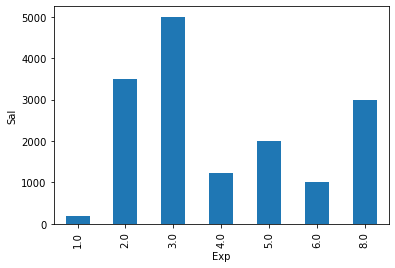

In [183]:
data.groupby('Exp')['Salary'].sum().plot.bar()
plt.xlabel('Exp')
plt.ylabel('Sal')
plt.show

In [184]:
import numpy as np

In [185]:
import warnings
warnings.filterwarnings('ignore')

In [186]:
for fetaures in features_with_na_num:
    data[features]=np.log(data[features])

In [187]:
data

,Name,Design,Salary,ID,Exp,Salary nan,Exp nan
0,barathi,analytics,1000.0,1,0.475885,0,0
1,saravana,lead,2000.0,2,-0.366513,0,0
2,bala,clerk,1000.0,3,0.583198,0,0
3,Missing,security,500.0,4,-0.366513,0,0
4,fahad,bench,500.0,5,-0.366513,0,0
5,karunya,developer,1000.0,6,0.475885,0,0
6,dharan,Missing,3000.0,7,0.732099,0,0
7,Missing,Missing,1000.0,8,0.094048,1,1
8,karthi,Missing,1000.0,9,0.094048,1,1
9,rajendran,painter,200.0,10,-inf,0,0


# Automated EDA
    

In [188]:
from autoviz.AutoViz_Class import AutoViz_Class
AV=AutoViz_Class

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


In [193]:
filename='EDA.csv'
sep=','
dft=AV.AutoViz(filename,sep=',',depVar="",dfte=None,header=0)

TypeError: AutoViz() missing 1 required positional argument: 'filename'

In [1]:
!pip install dtale

  Created wheel for dash: filename=dash-1.20.0-py3-none-any.whl size=85836 sha256=dee5b4d3c46f0e9ac379df47d1e94acf4d0381c3210c04ae66a89825d149f953
  Stored in directory: c:\users\120761\appdata\local\pip\cache\wheels\e3\1e\fa\0c810b67f082a7b9f33a128f6374b03cf5245edc45e37adbf8
  Created wheel for dash-colorscales: filename=dash_colorscales-0.0.4-py3-none-any.whl size=62603 sha256=1ef96a656613acda55294a61e5ef6b49b4e9dbe54377fe99aa00144bc8442636
  Stored in directory: c:\users\120761\appdata\local\pip\cache\wheels\fe\33\33\172dbfe1efc739352828854a113df599a428b58f68ed0c4f75
  Created wheel for ppscore: filename=ppscore-1.2.0-py2.py3-none-any.whl size=13055 sha256=678816036e5563d96693c7c8facd49bd621c40bd9f3de94772f16bdee238269b
  Stored in directory: c:\users\120761\appdata\local\pip\cache\wheels\fb\0e\65\da65ce669381fc01b6ef990d301d3586991f89bff1175877a4
  Created wheel for dash-daq: filename=dash_daq-0.5.0-py3-none-any.whl size=669706 sha256=e033f0a673adcf3e29a6127c05c51b351388bbd75e8b039

In [3]:
import seaborn as sns

df=sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
import dtale

In [5]:
dtale.show(df)

2021-07-01 19:24:34,059 - INFO     - NumExpr defaulting to 4 threads.


Executing shutdown due to inactivity...


2021-07-01 20:49:10,413 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2021-07-01 20:49:14,509 - INFO     - Executing shutdown...
